# Deep Fundamental Factor Models

#### Author: Matthew Dixon
#### Email: matthew.dixon@iit.edu
#### License: MIT license
#### Date: 10.13.2019
#### Citation: If you use this code for your research, please cite the following paper

##### Description

In [2]:
import csv
import pickle
import pandas as pd
import numpy as np
import re
import math
import random
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.regularizers import l1,l2
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from keras.callbacks import EarlyStopping
import os
#from utilities import *
#from view import *
import statsmodels.api as sm
#import datetime as dt
import time
from dateutil.relativedelta import *

# comment these if running python instead of ipython
#%load_ext autoreload
%matplotlib inline
#%autoreload 1

Using TensorFlow backend.
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading

## Models Loading

In [3]:
models = {}
models['linear']=[]
models['NN']=[]
models['PLS_NN']=[]

In [4]:
betas = {}
betas['NN'] =[]
betas['linear'] =[]
betas['PLS_NN'] =[]

In [5]:
xs = {}
ys = {}

In [6]:
xs['train_PLS']=[]
xs['test_PLS']=[]
ys['train_PLS']=[]
ys['test_PLS']=[]

In [7]:
xs['train_linear'] = []
xs['test_linear']=[]
ys['train_linear']=[]
ys['test_linear']=[]

In [8]:
xs['train']=[]
xs['test']=[]
ys['train']=[]
ys['test']=[]

In [9]:
NN_models_folder = '../models/NN'
PLS_models_folder = '../models/PLS_NN'
vars_explained = [50, 80, 95]

In [10]:
def load_PLS(models, vars_explained = os.listdir(PLS_models_folder)):
    for var in vars_explained:
        models_folder = '%s/%s' % (PLS_models_folder, var)
        models_saved = os.listdir(models_folder)
        for training_periods, model_name in enumerate(models_saved):
            model_loc = '%s/%s/%s' % (PLS_models_folder, var, model_name)
            print(model_loc)
            model = load_model(model_loc)
            models['PLS_NN'].append(model)
    return models, training_periods+1

def load_NN(models):
    models_saved = os.listdir(NN_models_folder)
    for model_name in models_saved:
        model_loc = '%s/%s' % (NN_models_folder, model_name)
        print(model_loc)
        model = load_model(model_loc)
        models['NN'].append(model)
    return models

def load_all_models(models, vars_explained):
    models, training_periods = load_PLS(models, vars_explained)
    models = load_NN(models)
    return models, training_periods

In [11]:
models, training_periods = load_PLS(models, vars_explained)

../models/PLS_NN/50/model_1989-12-01
../models/PLS_NN/50/model_1990-01-01
../models/PLS_NN/50/model_1990-02-01
../models/PLS_NN/50/model_1990-03-01
../models/PLS_NN/50/model_1990-04-01
../models/PLS_NN/50/model_1990-05-01
../models/PLS_NN/50/model_1990-06-01
../models/PLS_NN/50/model_1990-07-01
../models/PLS_NN/50/model_1990-08-01
../models/PLS_NN/50/model_1990-09-01
../models/PLS_NN/50/model_1990-10-01
../models/PLS_NN/50/model_1990-11-01
../models/PLS_NN/50/model_1990-12-01
../models/PLS_NN/50/model_1991-01-01
../models/PLS_NN/50/model_1991-02-01
../models/PLS_NN/50/model_1991-03-01
../models/PLS_NN/50/model_1991-04-01
../models/PLS_NN/50/model_1991-05-01
../models/PLS_NN/50/model_1991-06-01
../models/PLS_NN/50/model_1991-07-01
../models/PLS_NN/50/model_1991-08-01
../models/PLS_NN/50/model_1991-09-01
../models/PLS_NN/50/model_1991-10-01
../models/PLS_NN/50/model_1991-11-01
../models/PLS_NN/50/model_1991-12-01
../models/PLS_NN/50/model_1992-01-01
../models/PLS_NN/50/model_1992-02-01
.

../models/PLS_NN/50/model_2008-06-01
../models/PLS_NN/50/model_2008-07-01
../models/PLS_NN/50/model_2008-08-01
../models/PLS_NN/50/model_2008-09-01
../models/PLS_NN/50/model_2008-10-01
../models/PLS_NN/50/model_2008-11-01
../models/PLS_NN/50/model_2008-12-01
../models/PLS_NN/50/model_2009-01-01
../models/PLS_NN/50/model_2009-02-01
../models/PLS_NN/50/model_2009-03-01
../models/PLS_NN/50/model_2009-04-01
../models/PLS_NN/50/model_2009-05-01
../models/PLS_NN/50/model_2009-06-01
../models/PLS_NN/50/model_2009-07-01
../models/PLS_NN/50/model_2009-08-01
../models/PLS_NN/50/model_2009-09-01
../models/PLS_NN/50/model_2009-10-01
../models/PLS_NN/50/model_2009-11-01
../models/PLS_NN/50/model_2009-12-01
../models/PLS_NN/50/model_2010-01-01
../models/PLS_NN/50/model_2010-02-01
../models/PLS_NN/50/model_2010-03-01
../models/PLS_NN/50/model_2010-04-01
../models/PLS_NN/50/model_2010-05-01
../models/PLS_NN/50/model_2010-06-01
../models/PLS_NN/50/model_2010-07-01
../models/PLS_NN/50/model_2010-08-01
.

../models/PLS_NN/80/model_1999-04-01
../models/PLS_NN/80/model_1999-05-01
../models/PLS_NN/80/model_1999-06-01
../models/PLS_NN/80/model_1999-07-01
../models/PLS_NN/80/model_1999-08-01
../models/PLS_NN/80/model_1999-09-01
../models/PLS_NN/80/model_1999-10-01
../models/PLS_NN/80/model_1999-11-01
../models/PLS_NN/80/model_1999-12-01
../models/PLS_NN/80/model_2000-01-01
../models/PLS_NN/80/model_2000-02-01
../models/PLS_NN/80/model_2000-03-01
../models/PLS_NN/80/model_2000-04-01
../models/PLS_NN/80/model_2000-05-01
../models/PLS_NN/80/model_2000-06-01
../models/PLS_NN/80/model_2000-07-01
../models/PLS_NN/80/model_2000-08-01
../models/PLS_NN/80/model_2000-09-01
../models/PLS_NN/80/model_2000-10-01
../models/PLS_NN/80/model_2000-11-01
../models/PLS_NN/80/model_2000-12-01
../models/PLS_NN/80/model_2001-01-01
../models/PLS_NN/80/model_2001-02-01
../models/PLS_NN/80/model_2001-03-01
../models/PLS_NN/80/model_2001-04-01
../models/PLS_NN/80/model_2001-05-01
../models/PLS_NN/80/model_2001-06-01
.

../models/PLS_NN/95/model_1990-02-01
../models/PLS_NN/95/model_1990-03-01
../models/PLS_NN/95/model_1990-04-01
../models/PLS_NN/95/model_1990-05-01
../models/PLS_NN/95/model_1990-06-01
../models/PLS_NN/95/model_1990-07-01
../models/PLS_NN/95/model_1990-08-01
../models/PLS_NN/95/model_1990-09-01
../models/PLS_NN/95/model_1990-10-01
../models/PLS_NN/95/model_1990-11-01
../models/PLS_NN/95/model_1990-12-01
../models/PLS_NN/95/model_1991-01-01
../models/PLS_NN/95/model_1991-02-01
../models/PLS_NN/95/model_1991-03-01
../models/PLS_NN/95/model_1991-04-01
../models/PLS_NN/95/model_1991-05-01
../models/PLS_NN/95/model_1991-06-01
../models/PLS_NN/95/model_1991-07-01
../models/PLS_NN/95/model_1991-08-01
../models/PLS_NN/95/model_1991-09-01
../models/PLS_NN/95/model_1991-10-01
../models/PLS_NN/95/model_1991-11-01
../models/PLS_NN/95/model_1991-12-01
../models/PLS_NN/95/model_1992-01-01
../models/PLS_NN/95/model_1992-02-01
../models/PLS_NN/95/model_1992-03-01
../models/PLS_NN/95/model_1992-04-01
.

../models/PLS_NN/95/model_2008-08-01
../models/PLS_NN/95/model_2008-09-01
../models/PLS_NN/95/model_2008-10-01
../models/PLS_NN/95/model_2008-11-01
../models/PLS_NN/95/model_2008-12-01
../models/PLS_NN/95/model_2009-01-01
../models/PLS_NN/95/model_2009-02-01
../models/PLS_NN/95/model_2009-03-01
../models/PLS_NN/95/model_2009-04-01
../models/PLS_NN/95/model_2009-05-01
../models/PLS_NN/95/model_2009-06-01
../models/PLS_NN/95/model_2009-07-01
../models/PLS_NN/95/model_2009-08-01
../models/PLS_NN/95/model_2009-09-01
../models/PLS_NN/95/model_2009-10-01
../models/PLS_NN/95/model_2009-11-01
../models/PLS_NN/95/model_2009-12-01
../models/PLS_NN/95/model_2010-01-01
../models/PLS_NN/95/model_2010-02-01
../models/PLS_NN/95/model_2010-03-01
../models/PLS_NN/95/model_2010-04-01
../models/PLS_NN/95/model_2010-05-01
../models/PLS_NN/95/model_2010-06-01
../models/PLS_NN/95/model_2010-07-01
../models/PLS_NN/95/model_2010-08-01
../models/PLS_NN/95/model_2010-09-01
../models/PLS_NN/95/model_2010-10-01
.

In [12]:
models = load_NN(models)

../models/NN/model_1989-12-01
../models/NN/model_1990-01-01
../models/NN/model_1990-02-01
../models/NN/model_1990-03-01
../models/NN/model_1990-04-01
../models/NN/model_1990-05-01
../models/NN/model_1990-06-01
../models/NN/model_1990-07-01
../models/NN/model_1990-08-01
../models/NN/model_1990-09-01
../models/NN/model_1990-10-01
../models/NN/model_1990-11-01
../models/NN/model_1990-12-01
../models/NN/model_1991-01-01
../models/NN/model_1991-02-01
../models/NN/model_1991-03-01
../models/NN/model_1991-04-01
../models/NN/model_1991-05-01
../models/NN/model_1991-06-01
../models/NN/model_1991-07-01
../models/NN/model_1991-08-01
../models/NN/model_1991-09-01
../models/NN/model_1991-10-01
../models/NN/model_1991-11-01
../models/NN/model_1991-12-01
../models/NN/model_1992-01-01
../models/NN/model_1992-02-01
../models/NN/model_1992-03-01
../models/NN/model_1992-04-01
../models/NN/model_1992-05-01
../models/NN/model_1992-06-01
../models/NN/model_1992-07-01
../models/NN/model_1992-08-01
../models/

../models/NN/model_2012-10-01
../models/NN/model_2012-11-01
../models/NN/model_2012-12-01
../models/NN/model_2013-01-01
../models/NN/model_2013-02-01
../models/NN/model_2013-03-01
../models/NN/model_2013-04-01
../models/NN/model_2013-05-01
../models/NN/model_2013-06-01
../models/NN/model_2013-07-01
../models/NN/model_2013-08-01
../models/NN/model_2013-09-01
../models/NN/model_2013-10-01
../models/NN/model_2013-11-01
../models/NN/model_2013-12-01
../models/NN/model_2014-01-01
../models/NN/model_2014-02-01
../models/NN/model_2014-03-01
../models/NN/model_2014-04-01
../models/NN/model_2014-05-01
../models/NN/model_2014-06-01
../models/NN/model_2014-07-01
../models/NN/model_2014-08-01
../models/NN/model_2014-09-01
../models/NN/model_2014-10-01
../models/NN/model_2014-11-01
../models/NN/model_2014-12-01
../models/NN/model_2015-01-01
../models/NN/model_2015-02-01
../models/NN/model_2015-03-01
../models/NN/model_2015-04-01
../models/NN/model_2015-05-01
../models/NN/model_2015-06-01
../models/

## Datasets Loading

In [13]:
def load_datasets_PLS(training_periods, vars_explained = os.listdir(PLS_models_folder)):
    
    for var in vars_explained: 
        print(var)
        x_trains_folder = "%s/%i/x_train" % (PLS_data_folder, var)
        y_trains_folder = "%s/%i/y_train" % (PLS_data_folder, var)
        x_tests_folder = "%s/%i/x_test" % (PLS_data_folder, var)
        y_tests_folder = "%s/%i/y_test" % (PLS_data_folder, var)

        x_trains_files = os.listdir(x_trains_folder)
        y_trains_files = os.listdir(y_trains_folder)
        x_tests_files = os.listdir(x_tests_folder)
        y_tests_files = os.listdir(y_tests_folder)
        
        for i in range( training_periods ):
            x_train_file = "%s/%s" % (x_trains_folder, x_trains_files[i])
            y_train_file = "%s/%s" % (y_trains_folder, y_trains_files[i])
            x_test_file = "%s/%s" % (x_tests_folder, x_tests_files[i])
            y_test_file = "%s/%s" % (y_tests_folder, y_tests_files[i])

            x_train = pd.read_csv(x_train_file)
            y_train = pd.read_csv(y_train_file)
            x_test = pd.read_csv(x_test_file)
            y_test = pd.read_csv(y_test_file)

            x_train.drop(columns='Unnamed: 0', inplace=True)
            y_train.drop(columns='Unnamed: 0', inplace=True)
            x_test.drop(columns='Unnamed: 0', inplace=True)
            y_test.drop(columns='Unnamed: 0', inplace=True)
            
            n_inputs = x_train.shape[1]
            if n_inputs ==0:
                next
            
            xs['train_PLS'].append(x_train)
            ys['train_PLS'].append(y_train)
            xs['test_PLS'].append(x_test)
            ys['test_PLS'].append(y_test)
    
    return

In [14]:
def load_dataset_NN(X, Y, training_dates):
    
    for date in training_dates:
        #start_time = timeit.default_timer()  
        train_index = Y[Y['date']==date].index

        if len(train_index)==0:
            next

        date_next=pd.Timestamp(np.datetime64(date)).to_pydatetime() + relativedelta(months=+1)
        date_next = date_next.strftime('%Y-%m-%d')
        test_index  = Y[Y['date']==date_next].index
        
        if len(test_index)==0:
            next

        x_train = X.loc[train_index]
        x_train=x_train.drop("date", axis=1)
        y_train = Y.loc[train_index]
        y_train= y_train.drop("date", axis=1)
        x_test  = X.loc[test_index]
        x_test=x_test.drop("date", axis=1)
        y_test =  Y.loc[test_index]
        y_test=y_test.drop("date", axis=1)

        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next            

        xs['train'].append(x_train)
        xs['test'].append(x_test)
        ys['train'].append(y_train)
        ys['test'].append(y_test)
            
    return

In [15]:
PLS_data_folder = '../data/PLS_data'

In [16]:
# Load the data
X=pd.read_csv('../../data/X.csv') #Here '../..' because the files are stored on my computer in another folder
Y=pd.read_csv('../../data/Y_untouched.csv')

In [17]:
load_datasets_PLS(training_periods, vars_explained)

50
80
95


In [18]:
Y.dropna(inplace=True)
dates = Y.drop_duplicates('date')
dates = list(dates['date'][0:training_periods])

load_dataset_NN(X, Y, dates)

# Training Functions

In [19]:
# define neural network model in Keras
def NN(n_inputs, n_units = 30, dropout =0.1, l1_reg =0.001, activation='relu', L=2):
    # L>0 is the number of hidden layers
    
    model = Sequential()
    model.add(Dense(units=n_units, input_dim=n_inputs, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
    model.add(Dropout(dropout))
    for i in range (0,L-1):
        model.add(Dense(units=n_units, kernel_regularizer=l1(l1_reg), kernel_initializer='normal', activation=activation))
        model.add(Dropout(dropout))
    model.add(Dense(1, kernel_initializer='normal')) 
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'])
    return(model)

In [20]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=3)

In [21]:
"""
 NN parameter tuning:
"""
def parameter_tuning(X, y, cv=3, seed = 7):


   param_grid = dict(n_inputs=[X.shape[1]],n_units=[50,100,200], l1_reg = [0, 0.0001, 0.001,0.01], activation=['relu','tanh']) # dropout=[0, 0.1, 0.2, 0.3],  #n_hidden_neurons=[10,50,100], 
   estimator = KerasRegressor(build_fn=NN, epochs=100, batch_size=50, verbose=0)   
   grid = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=cv)
   grid_result = grid.fit(X, y)
 
   print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
   means = grid_result.cv_results_['mean_test_score']
   stds = grid_result.cv_results_['std_test_score']
   params = grid_result.cv_results_['params']
   for mean, stdev, param in zip(means, stds, params):
         print("%f (%f) with: %r" % (mean, stdev, param))

In [170]:
def training_LASSO(X, Y, training_dates):
    i=0
    for date in training_dates:
        print(i, date)
        train_index = Y[Y['date']==date].index

        if len(train_index)==0:
            next
        date_next=pd.Timestamp(np.datetime64(date)).to_pydatetime() + relativedelta(months=+1)
        date_next = date_next.strftime('%Y-%m-%d')
        test_index  = Y[Y['date']==date_next].index   
        if len(test_index)==0:
            next
            
        x_train = X.loc[train_index]
        x_train=x_train.drop("date", axis=1)
        y_train = Y.loc[train_index]
        y_train= y_train.drop("date", axis=1)
        x_test  = X.loc[test_index]
        x_test=x_test.drop("date", axis=1)
        y_test =  Y.loc[test_index]
        y_test=y_test.drop("date", axis=1)


        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next
            
        interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
        x = interaction.fit_transform(x_train)
        model=linear_model.LassoCV(n_alphas=50, fit_intercept=True, normalize=False).fit(x,y_train)
        betas['LASSO'].append(model.coef_[:49])   # with elements from index first to last – 1
        beta_interacts['LASSO'].append(model.coef_[49:])
        models['LASSO'].append(model)

In [23]:
"""X_try = pd.read_csv('../../data/X_untouched.csv')
Y_try = pd.read_csv('../../data/Y_untouched.csv')

X_try.drop("date", axis=1)

Y_try.dropna(inplace=True)
dates_try = Y_try.drop_duplicates('date')

dates_try = list(dates_try['date'][0:332])

date_try = dates_try[0]

train_index_try = Y_try[Y_try['date']==date_try].index

data_try = X_try.loc[train_index_try]

print(data_try.shape == sm.add_constant(data_try).shape)
print(data_try.shape == sm.add_constant(data_try, has_constant='add').shape)"""

True
False


In [19]:
def training_OLS(X, Y, training_dates):
    i=0
    for date in training_dates:
        #start_time = timeit.default_timer()  
        print(i, date)
        train_index = Y[Y['date']==date].index

        if len(train_index)==0:
            next

        date_next=pd.Timestamp(np.datetime64(date)).to_pydatetime() + relativedelta(months=+1)
        date_next = date_next.strftime('%Y-%m-%d')
        test_index  = Y[Y['date']==date_next].index
        
        if len(test_index)==0:
            next


        x_train = X.loc[train_index]
        x_train=x_train.drop("date", axis=1)
        y_train = Y.loc[train_index]
        y_train= y_train.drop("date", axis=1)
        x_test  = X.loc[test_index]
        x_test=x_test.drop("date", axis=1)
        y_test =  Y.loc[test_index]
        y_test=y_test.drop("date", axis=1)


        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next
            
        x=sm.add_constant(x_train, has_constant='add')
        model =sm.OLS(y_train, x).fit()   
        betas['linear'].append(model.params)
        models['linear'].append(model)
        xs['train_linear'].append(x_train)
        xs['test_linear'].append(x_test)
        ys['train_linear'].append(y_train)
        ys['test_linear'].append(y_test)
        
        i+=1
        
    return
        

In [6]:
def training_NN_OLS(X, Y, training_dates, L):
    
    #{'activation': 'tanh', 'l1_reg': 0, 'n_inputs': 49, 'n_units': 200}
    n_epoches = 100  # maximum number of epoches (to be used with early stopping)
    n_batch = 50     # mini-batch size
    drop_out = 0.0   # level of dropout (set between 0 and 1)
    n_units = 200
    l1_reg = 0.00  # L_1 regularization parameter
    tune = False     # set to true to perform cross-validation for parameter tuning
    activation='tanh'

    i=0
    for date in training_dates:
        #start_time = timeit.default_timer()  
        print(i, date)
        train_index = Y[Y['date']==date].index

        if len(train_index)==0:
            next
        date_next=pd.Timestamp(np.datetime64(date)).to_pydatetime() + relativedelta(months=+1)
        date_next = date_next.strftime('%Y-%m-%d')
        test_index  = Y[Y['date']==date_next].index
        if len(test_index)==0:
            next


        x_train = X.loc[train_index]
        x_train=x_train.drop("date", axis=1)
        y_train = Y.loc[train_index]
        y_train= y_train.drop("date", axis=1)
        x_test  = X.loc[test_index]
        x_test=x_test.drop("date", axis=1)
        y_test =  Y.loc[test_index]
        y_test=y_test.drop("date", axis=1)


        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next

        if tune:
            print("cross-validation...")
            parameter_tuning(x_train, y_train, 3)
            tune=False

        model = NN(n_units=n_units, n_inputs=n_inputs, dropout=drop_out, l1_reg=l1_reg, activation=activation, L=L)
        model.fit(x_train.values, y_train.values, epochs=n_epoches, batch_size=n_batch, verbose=0, callbacks=[es])   
        beta=sensitivities(model, x_train.values, L, activation)   
        models['NN'].append(model)
        betas['NN'].append(beta)
        
        x=sm.add_constant(x_train)
        model =sm.OLS(y_train, x).fit()   
        betas['linear'].append(model.params)
        models['linear'].append(model)
        xs['train'].append(x_train)
        xs['test'].append(x_test)
        ys['train'].append(y_train)
        ys['test'].append(y_test)

        #elapsed = timeit.default_timer() - start_time
        #print("Elapsed time:" + str(elapsed) + " (s)")
        i+=1
        
    return

In [7]:
def training_PLS(L, variance, training_periods):
    
    n_epoches = 100  # maximum number of epoches (to be used with early stopping)
    n_batch = 50     # mini-batch size
    drop_out = 0.0   # level of dropout (set between 0 and 1)
    tune = False     # set to true to perform cross-validation for parameter tuning

    if variance == 50: #{'activation': 'tanh', 'l1_reg': 0, 'n_inputs': 14, 'n_units': 100}
        n_units = 100
        l1_reg = 0.00  # L_1 regularization parameter
        activation='tanh'
    elif variance == 80: #{'activation': 'tanh', 'l1_reg': 0.0001, 'n_inputs': 28, 'n_units': 50}
        n_units = 50
        l1_reg = 0.0001  # L_1 regularization parameter
        activation='tanh'
    elif variance == 95: #{'activation': 'tanh', 'l1_reg': 0, 'n_inputs': 37, 'n_units': 100}
        n_units = 100
        l1_reg = 0.00  # L_1 regularization parameter
        activation='tanh'
        
    x_trains_folder = "../data/PLS_data/%i/x_train" % var
    y_trains_folder = "../data/PLS_data/%i/y_train" % var
    x_tests_folder = "../data/PLS_data/%i/x_test" % var
    y_tests_folder = "../data/PLS_data/%i/y_test" % var
    
    XTRAIN = os.listdir(x_trains_folder)
    YTRAIN = os.listdir(y_trains_folder)
    XTEST = os.listdir(x_tests_folder)
    YTEST = os.listdir(y_tests_folder)  
    
    #start_time = timeit.default_timer()    

    #training_periods = np.min(len(XTRAIN), training_periods)
    
    for i in range( training_periods ):
        x_train_file = "%s/%s" % (x_trains_folder, XTRAIN[i])
        y_train_file = "%s/%s" % (y_trains_folder, YTRAIN[i])
        x_test_file = "%s/%s" % (x_tests_folder, XTEST[i])
        y_test_file = "%s/%s" % (y_tests_folder, YTEST[i])
        
        x_train = pd.read_csv(x_train_file)
        y_train = pd.read_csv(y_train_file)
        x_test = pd.read_csv(x_test_file)
        y_test = pd.read_csv(y_test_file)
        
        x_train.drop(columns='Unnamed: 0', inplace=True)
        y_train.drop(columns='Unnamed: 0', inplace=True)
        x_test.drop(columns='Unnamed: 0', inplace=True)
        y_test.drop(columns='Unnamed: 0', inplace=True)
        
        n_inputs = x_train.shape[1]
        if n_inputs ==0:
            next

        if tune:
            print("cross-validation...")
            parameter_tuning(x_train, y_train, 3)
            tune=False
        
        model = NN(n_units=n_units, n_inputs=n_inputs, dropout=drop_out, l1_reg=l1_reg, activation=activation, L=L)        
        model.fit(x_train.values, y_train.values, epochs=n_epoches, batch_size=n_batch, verbose=0, callbacks=[es])   
        beta=sensitivities(model, x_train.values, L, activation)   
        models['PLS_NN'].append(model)
        betas['PLS_NN'].append(beta)

        xs['train_PLS'].append(x_train)
        xs['test_PLS'].append(x_test)
        ys['train_PLS'].append(y_train)
        ys['test_PLS'].append(y_test)

        #elapsed = timeit.default_timer() - start_time
        #print("Elapsed time:" + str(elapsed) + " (s)")
    
    return

In [20]:
# Compute the sensitivites of the network for either tanh or ReLU
def sensitivities(lm, X, L, activation='tanh'):
    
    W=lm.get_weights()
    M = np.shape(X)[0]
    p = np.shape(X)[1]
    beta=np.array([0]*M*(p+1), dtype='float32').reshape(M,p+1)
    B_0 =W[1]
    for i in range (0,L):
      if activation=='tanh':  
        B_0 = (np.dot(np.transpose(W[2*(i+1)]),np.tanh(B_0))+W[2*(i+1)+1])
      elif activation=='relu':
        B_0 = (np.dot(np.transpose(W[2*(i+1)]),np.maximum(B_0,0))+W[2*(i+1)+1])
    
          
    beta[:,0]= B_0 # intercept \beta_0= F_{W,b}(0)
    for i in range(M):
      I1 = np.dot(np.transpose(W[0]),np.transpose(X[i,])) + W[1]
      if activation=='tanh':
          Z= np.tanh(I1)  
          D = np.diag(1-Z**2)
      elif activation=='relu':
          Z=np.maximum(I1,0)
          D = np.diag(np.sign(Z)) 
               
      for j in range(p):
        J = np.dot(D,W[0][j])       
        for a in range (1,L):
          I= np.dot(np.transpose(W[2*a]),Z) + W[2*a+1] 
          if activation=='tanh':  
              Z = np.tanh(I)
              D = np.diag(1-Z**2)
          elif activation=='relu':    
              Z=np.maximum(I,0)
              D = np.diag(np.sign(Z)) 
          J = np.dot(np.dot(D,np.transpose(W[a*2])),J)
        beta[i,j+1]=np.dot(np.transpose(W[2*L]),J)
            
    return(beta)

## Training of models 

## Run all trainings

In [ ]:
# Run all trainings

models = {}
models['linear']=[]
models['NN']=[]
models['PLS_NN']=[]

betas = {}
betas['NN'] =[]
betas['linear'] =[]
betas['PLS_NN'] =[]

xs = {}
ys = {}

xs['train']=[]
xs['test']=[]
ys['train']=[]
ys['test']=[]

xs['train_PLS']=[]
xs['test_PLS']=[]
ys['train_PLS']=[]
ys['test_PLS']=[]

vars_explained = [50, 80, 95]

for var in vars_explained:
    training_periods = 332
    L = 2
    start = time.time()
    training_PLS(L, var, training_periods)
    print(var, "% Variance explained took", time.time()-start, "s for", training_periods, "training periods")
    

L=2 # Number of hidden layers
training_periods = 332 # number of model training and evaluation periods
Y.dropna(inplace=True)
dates = Y.drop_duplicates('date')
dates = list(dates['date'][0:training_periods])

training_NN_OLS(X,Y,dates,L)

save_all_models()

## Run PLS

In [ ]:
# 50%:
#2250 seconds = 38min for 5 dates + tuning for 50% var explained
# Best: -0.014796 using {'activation': 'tanh', 'l1_reg': 0, 'n_inputs': 14, 'n_units': 100}

# 80%:
#1083 seconds
# Best: -0.015962 using {'activation': 'tanh', 'l1_reg': 0.0001, 'n_inputs': 28, 'n_units': 50}

# 95%:
# Best: -0.015735 using {'activation': 'tanh', 'l1_reg': 0, 'n_inputs': 37, 'n_units': 100}

#vars_explained = [50,70,80,90,95,99]
vars_explained = [95]

for var in vars_explained:
    training_periods = 20
    L = 2
    start = time.time()
    training_PLS(L, var, training_periods)
    print(var, "% Variance explained took", time.time()-start, "s for", training_periods, "training periods")

## Run NN and OLS

In [ ]:
#n = len(np.unique(Y['date']))
#dates = np.unique(Y['date'])[(n-training_periods):n] 

#Best: -0.016099 using {'activation': 'tanh', 'l1_reg': 0, 'n_inputs': 49, 'n_units': 200}

L=2 # Number of hidden layers
training_periods = 20 # number of model training and evaluation periods
Y.dropna(inplace=True)
dates = Y.drop_duplicates('date')
dates = list(dates['date'][0:training_periods])

training_NN_OLS(X,Y,dates,L)

## Run OLS

In [21]:
training_periods = 332 # number of model training and evaluation periods
Y.dropna(inplace=True)
dates = Y.drop_duplicates('date')
dates = list(dates['date'][0:training_periods])

training_OLS(X, Y, dates)

0 1989-12-01
1 1990-01-01
2 1990-02-01
3 1990-03-01
4 1990-04-01
5 1990-05-01
6 1990-06-01
7 1990-07-01
8 1990-08-01
9 1990-09-01
10 1990-10-01
11 1990-11-01
12 1990-12-01
13 1991-01-01
14 1991-02-01
15 1991-03-01
16 1991-04-01
17 1991-05-01
18 1991-06-01
19 1991-07-01
20 1991-08-01
21 1991-09-01
22 1991-10-01
23 1991-11-01
24 1991-12-01
25 1992-01-01
26 1992-02-01
27 1992-03-01
28 1992-04-01
29 1992-05-01
30 1992-06-01
31 1992-07-01
32 1992-08-01
33 1992-09-01
34 1992-10-01
35 1992-11-01
36 1992-12-01
37 1993-01-01
38 1993-02-01
39 1993-03-01
40 1993-04-01
41 1993-05-01
42 1993-06-01
43 1993-07-01
44 1993-08-01
45 1993-09-01
46 1993-10-01
47 1993-11-01
48 1993-12-01
49 1994-01-01
50 1994-02-01
51 1994-03-01
52 1994-04-01
53 1994-05-01
54 1994-06-01
55 1994-07-01
56 1994-08-01
57 1994-09-01
58 1994-10-01
59 1994-11-01
60 1994-12-01
61 1995-01-01
62 1995-02-01
63 1995-03-01
64 1995-04-01
65 1995-05-01
66 1995-06-01
67 1995-07-01
68 1995-08-01
69 1995-09-01
70 1995-10-01
71 1995-11-01
72

In [175]:
training_periods = 332 # number of model training and evaluation periods
Y.dropna(inplace=True)
dates = Y.drop_duplicates('date')
dates = list(dates['date'][0:training_periods])

beta_interacts = {}

models["LASSO"] = []
betas['LASSO'] = []
beta_interacts['LASSO'] = []
training_LASSO(X, Y, dates)

0 1989-12-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004048597351554051, tolerance: 0.0012364430311828664
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.015227488307602677, tolerance: 0.0012364430311828664
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

0 1990-01-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038884217882211303, tolerance: 0.001484321610108938
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002549655696768127, tolerance: 0.001484321610108938
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

0 1990-02-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0018426503047654919, tolerance: 0.0017875331761328583
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006875698971403388, tolerance: 0.0017875331761328583
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective d

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01043149192293491, tolerance: 0.0015603016352797332
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01970832229335162, tolerance: 0.0015603016352797332
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03134787436524977, tolerance: 0.0015603016352797332
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

0 1990-03-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004373452170427505, tolerance: 0.0015482641022689595
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.027329168729547604, tolerance: 0.0015482641022689595
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.034152712275926866, tolerance: 0.0015482641022689595
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not con

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003093794076810319, tolerance: 0.0018368421310552088
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0026123105127231483, tolerance: 0.0018368421310552088
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0024164930213759206, tolerance: 0.0018368421310552088
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not c

0 1990-04-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005238130604568347, tolerance: 0.0017703445901852731
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002540172456131806, tolerance: 0.0017703445901852731
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03237879113333619, tolerance: 0.00154726315056432
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0677106582902347, tolerance: 0.00154726315056432
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08986113023664632, tolerance: 0.00154726315056432
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20581696955295747, tolerance: 0.0017937397368481798
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1390897344487625, tolerance: 0.0017937397368481798
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1436570842797238, tolerance: 0.0017937397368481798
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

0 1990-05-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003771606150508866, tolerance: 0.0017850254947627481
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03341411453777976, tolerance: 0.0017850254947627481
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.03714466307573261, tolerance: 0.0017981660664407643
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.044688964230672035, tolerance: 0.0017981660664407643
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06726288401379943, tolerance: 0.0017981660664407643
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

0 1990-06-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023855142011512953, tolerance: 0.002320013942974307
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034518667522247526, tolerance: 0.002320013942974307
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

0 1990-07-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.013784849983876413, tolerance: 0.002146794974213794
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0034485269372339644, tolerance: 0.0022109335134764545
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

0 1990-08-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004508411930080669, tolerance: 0.00229684455283265
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006776943870783647, tolerance: 0.00229684455283265
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did no

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15694590302986455, tolerance: 0.0023847710856274673
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15339806432098246, tolerance: 0.0023847710856274673
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.19312186657010688, tolerance: 0.0023847710856274673
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

0 1990-09-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003995226281805486, tolerance: 0.0031904349747082527
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003754336942723313, tolerance: 0.0031904349747082527
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0038600700439825886, tolerance: 0.003144478022247246
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008896424873190867, tolerance: 0.003144478022247246
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010783810890556467, tolerance: 0.003144478022247246
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

0 1990-10-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005340319335322974, tolerance: 0.0035789392955149703
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004385819133318591, tolerance: 0.0035789392955149703
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

0 1990-11-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003349782041944138, tolerance: 0.0032521018969588313
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00835011117341633, tolerance: 0.0032521018969588313
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did

0 1990-12-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.023390877085811113, tolerance: 0.0028109095725759566
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006706976418995758, tolerance: 0.0028109095725759566
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.010115516263635271, tolerance: 0.003153247537120835
  positive)


0 1991-01-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0036150420211154, tolerance: 0.002218047781249842
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008027255280374845, tolerance: 0.002218047781249842
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did no

0 1991-02-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.030856588145153907, tolerance: 0.0015268436422712286
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0023277343618186563, tolerance: 0.0015268436422712286
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective d

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.18476014875984026, tolerance: 0.0016246784536281646
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1306965171756551, tolerance: 0.0016246784536281646
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0030902487053960925, tolerance: 0.0016679381979265065
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conve

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06446713399279647, tolerance: 0.0015382242456850293
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20291584495549042, tolerance: 0.0015382242456850293
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4307974143697755, tolerance: 0.0015382242456850293
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

0 1991-03-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21158130644605588, tolerance: 0.0015552527605322186
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4016058680004866, tolerance: 0.0015552527605322186
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did n

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011241513748392329, tolerance: 0.0015578497645959235
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7579046471186568, tolerance: 0.0015578497645959235
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5980630130526283, tolerance: 0.0015578497645959235
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.058832240538359226, tolerance: 0.0015783112070771705
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09397198296355569, tolerance: 0.001350436236390242
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6032646960692603, tolerance: 0.001350436236390242
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

0 1991-04-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006100220999250894, tolerance: 0.0015549861616913103
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021670128662663046, tolerance: 0.0015549861616913103
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective d

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.005993641383884807, tolerance: 0.001550224077628193
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.008955808072397708, tolerance: 0.001550224077628193
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08527297803585032, tolerance: 0.001550224077628193
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converg

0 1991-05-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003266297218699421, tolerance: 0.001791985647556522
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029741454235168163, tolerance: 0.001791985647556522
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.01439684946961517, tolerance: 0.001791985647556522
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.011522830274742546, tolerance: 0.0017430484021173271
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09792802404109757, tolerance: 0.00185954232522394
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.014938113394775243, tolerance: 0.00185954232522394
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge

0 1991-06-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.006454444775039647, tolerance: 0.0020459817936980783
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016001458462516993, tolerance: 0.0020459817936980783
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective di

0 1991-07-01


C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002965549683046298, tolerance: 0.001829450414451246
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.016346799643770282, tolerance: 0.001829450414451246
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did 

C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012127732352254839, tolerance: 0.001765450463539441
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.012218583306586872, tolerance: 0.001765450463539441
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.022667045538209862, tolerance: 0.001765450463539441
  positive)
C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not conver

Traceback (most recent call last):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\IPython\core\interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-175-ec0006dedb7a>", line 11, in <module>
    training_LASSO(X, Y, dates)
  File "<ipython-input-170-b19fe6fe4f5e>", line 31, in training_LASSO
    model=linear_model.LassoCV(n_alphas=50, fit_intercept=True, normalize=False).fit(x,y_train)
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py", line 1184, in fit
    **_joblib_parallel_args(prefer="threads"))(jobs)
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\kemen\anaconda3\envs\MLFenv\lib\site-

KeyboardInterrupt: 

In [30]:
training_periods = 332 # number of model training and evaluation periods

In [ ]:
#pickle.dump(betas, open('betas', 'wb'))
#pickle.dump(models, open('models', 'wb'))
#pickle.dump(xs, open('xs', 'wb'))
#pickle.dump(ys, open('ys', 'wb'))

In [ ]:
def save_all_models():
    
    for model_type, model_list in models.items():
        i=0
        if model_type == "PLS_NN":
            continue
            for model_to_save in model_list:
                name = '../models/%s/%i/model_%s' % (model_type, vars_explained[i//training_periods], dates[i%training_periods])
                model_to_save.save(name)
                i+=1
        else
            for model_to_save in model_list:
                name = '../models/%s/model_%s' % (model_type, dates[i])
                model_to_save.save(name)
                i+=1
        
save_all_models()

# Performance evaluation

In [22]:
testing_periods=training_periods-1

In [23]:
MSE = 0
y_hat_linear = []
MSE_array_linear=np.array([np.nan]*training_periods,dtype='float64')

for i in range(training_periods):
    x= sm.add_constant(xs['test_linear'][i].values, has_constant='add')
    y_hat_linear.append(models['linear'][i].predict(x))
    MSE_test_linear= mean_squared_error(y_hat_linear[-1], ys['test_linear'][i].values)
    #print(i,MSE_test_linear)
    MSE_array_linear[i]=MSE_test_linear
    MSE+=MSE_test_linear
    
print("MSE:" + str(MSE/training_periods))   
MSE_linear=MSE/training_periods

MSE:67.89308746781825


In [ ]:
# L_inf linear (testing)

In [24]:
L_inf = 0
y_hat_linear = []
L_inf_array_linear=np.array([np.nan]*training_periods,dtype='float64')

for i in range(training_periods):
    x= sm.add_constant(xs['test'][i].values, has_constant='add')
    y_hat_linear.append(models['linear'][i].predict(x))
    L_inf_test_linear= np.max(np.abs(np.array(y_hat_linear[-1]- ys['test'][i].values)))
    #print(i,MSE_test_linear)
    L_inf_array_linear[i]=L_inf_test_linear
    L_inf+=L_inf_test_linear
    
print("L_inf:" + str(L_inf/training_periods))
L_inf_linear=L_inf/training_periods

L_inf:19.4621971621287


In [ ]:
# MSEs linear (training)

In [25]:
MSE = 0
MSE_array_linear_in=np.array([0]*training_periods,dtype='float64')
y_hat_linear_is =[]

for i in range(training_periods):
    x= sm.add_constant(xs['train_linear'][i].values, has_constant='add')
    y_hat_linear_is.append(models['linear'][i].predict(x))
    MSE_test_linear= mean_squared_error(y_hat_linear_is[-1], ys['train_linear'][i].values)
    #print(i,MSE_test_linear)
    MSE_array_linear_in[i]=MSE_test_linear
    MSE+=MSE_test_linear
    
print("MSE:" + str(MSE/training_periods))
MSE_linear_in=MSE/training_periods

MSE:0.021586397407386812


In [ ]:
# L_inf linear (training)

In [26]:
L_inf = 0
y_hat_linear_is = []
L_inf_array_linear_in=np.array([0]*training_periods,dtype='float64')

for i in range(training_periods):
    x= sm.add_constant(xs['train_linear'][i].values, has_constant='add')
    y_hat_linear_is.append(models['linear'][i].predict(x))
    L_inf_test_linear= np.max(np.abs(np.array(y_hat_linear_is[-1]- ys['train_linear'][i].values)))
    #print(i,MSE_test_linear)
    L_inf_array_linear_in[i]=L_inf_test_linear
    L_inf+=L_inf_test_linear
    
print("L_inf:" + str(L_inf/training_periods))    
L_inf_linear_in=L_inf/training_periods

L_inf:1.458423237777348


In [28]:
# MSEs NNs (testing)

In [27]:
MSE =0
MSE_array_NN=np.array([np.nan]*testing_periods, dtype='float64')
y_hat_NN=[]

for i in range(testing_periods):
    y_hat_NN.append(models['NN'][i].predict(xs['test'][i].values))
    MSE_test_NN= mean_squared_error(y_hat_NN[-1], ys['test'][i].values)
    MSE_array_NN[i]=MSE_test_NN
    MSE+=MSE_test_NN
    
print("MSE:" + str(MSE/testing_periods))
MSE_NN=MSE/testing_periods

MSE:0.028383798041404524


In [ ]:
# L_inf NNs (testing)

In [28]:
L_inf =0
L_inf_array_NN=np.array([np.nan]*testing_periods, dtype='float64')
y_hat_NN=[]

for i in range(testing_periods):
    y_hat_NN.append(models['NN'][i].predict(xs['test'][i].values))
    L_inf_test_NN= np.max(np.abs(np.array(y_hat_NN[-1]- ys['test'][i].values)))
    L_inf_array_NN[i]=L_inf_test_NN
    L_inf+=L_inf_test_NN
    
print("L_inf:" + str(L_inf/testing_periods))  
L_inf_NN=L_inf/testing_periods

L_inf:1.0652164468241456


In [ ]:
# MSEs NN (training)

In [29]:
MSE =0
MSE_array_NN_in=np.array([np.nan]*training_periods, dtype='float64')
y_hat_NN_is =[]

for i in range(training_periods):
    y_hat_NN_is.append(models['NN'][i].predict(xs['train'][i].values))
    MSE_test_NN= mean_squared_error(y_hat_NN_is[-1], ys['train'][i].values)
    MSE_array_NN_in[i]=MSE_test_NN
    MSE+=MSE_test_NN
    
print("MSE:" + str(MSE/training_periods)) 
MSE_NN_in=MSE/training_periods

MSE:0.01853721598588011


In [ ]:
# L_inf NNS (training)

In [30]:
L_inf =0
L_inf_array_NN_in=np.array([np.nan]*training_periods, dtype='float64')
y_hat_NN_is =[]

for i in range(training_periods):
    y_hat_NN_is.append(models['NN'][i].predict(xs['train'][i].values))
    L_inf_test_NN= np.max(np.abs(np.array(y_hat_NN_is[-1]- ys['train'][i].values)))
    L_inf_array_NN_in[i]=L_inf_test_NN
    L_inf+=L_inf_test_NN
    
print("L_inf:" + str(L_inf/training_periods)) 
L_inf_NN_in = L_inf/training_periods

L_inf:0.7982862604103197


In [ ]:
# MSE PLS+NN (testing)

In [31]:
MSE_array_PLS_NN = {}
y_hat_PLS_NN={}
MSE_PLS_NN = {}

var_index = 0

for var in vars_explained:
    MSE = 0
    MSE_array_PLS_NN[var] = np.array([np.nan]*testing_periods, dtype='float64')
    y_hat_PLS_NN[var] = []
    
    for i in range(testing_periods):
        y_hat_PLS_NN[var].append(models['PLS_NN'][i+var_index].predict(xs['test_PLS'][i+var_index].values))
        MSE_test_PLS_NN = mean_squared_error(y_hat_PLS_NN[var][-1], ys['test_PLS'][i+var_index].values)
        MSE_array_PLS_NN[var][i] = MSE_test_PLS_NN
        MSE += MSE_test_PLS_NN
    
    var_index += training_periods
    print("MSE " + str(var) + "% : " + str(MSE/testing_periods))
    MSE_PLS_NN[var] = MSE/testing_periods

MSE 50% : 0.032858924302592754
MSE 80% : 0.029656462054564545
MSE 95% : 0.03733369819247455


In [ ]:
# L_inf PLS+NN (testing)

In [32]:
L_inf_array_PLS_NN = {}
y_hat_PLS_NN={}
L_inf_PLS_NN = {}

var_index = 0

for var in vars_explained:
    L_inf = 0
    L_inf_array_PLS_NN[var] = np.array([0]*testing_periods, dtype='float64')
    y_hat_PLS_NN[var] = []
    
    for i in range(testing_periods):
        y_hat_PLS_NN[var].append(models['PLS_NN'][i+var_index].predict(xs['test_PLS'][i+var_index].values))
        L_inf_test_PLS_NN= np.max(np.abs(np.array(y_hat_PLS_NN[var][-1]- ys['test_PLS'][i+var_index].values)))
        #print(i,L_inf_test_PLS_NN)
        L_inf_array_PLS_NN[var][i]=L_inf_test_PLS_NN
        L_inf+=L_inf_test_PLS_NN
    
    var_index += training_periods
    print("L_inf " + str(var) + "% : " + str(L_inf/testing_periods))  
    L_inf_PLS_NN[var] = L_inf/testing_periods

L_inf 50% : 0.9625064188560376
L_inf 80% : 0.9710842192102542
L_inf 95% : 0.9775535006834565


In [ ]:
# MSE PLS+NN (training)

In [33]:
MSE_array_PLS_NN_in = {}
y_hat_PLS_NN_is = {}
MSE_PLS_NN_in = {}

var_index = 0

for var in vars_explained:
    MSE = 0
    MSE_array_PLS_NN_in[var] = np.array([0]*training_periods, dtype='float64')
    y_hat_PLS_NN_is[var] =[]
    
    for i in range(testing_periods):
        y_hat_PLS_NN_is[var].append(models['PLS_NN'][i+var_index].predict(xs['train_PLS'][i+var_index].values))
        MSE_test_PLS_NN= mean_squared_error(y_hat_PLS_NN_is[var][-1], ys['train_PLS'][i+var_index].values)
        #MSE_test_NN= np.max(np.abs(np.array(y_hat_NN_is[-1]- ys['train'][i].values)))
        #print(i,MSE_test_NN)
        MSE_array_PLS_NN_in[var][i] = MSE_test_PLS_NN
        MSE += MSE_test_PLS_NN
        
    var_index += training_periods
    print("MSE " + str(var) + "% : " + str(MSE/training_periods)) 
    MSE_PLS_NN_in[var] = MSE/training_periods

MSE 50% : 0.021626527844287584
MSE 80% : 0.021194633802690866
MSE 95% : 0.018485198242380547


In [ ]:
# L_inf PLS+NN (training)

In [34]:
L_inf_array_PLS_NN_in = {}
y_hat_PLS_NN_is = {}
L_inf_PLS_NN_in = {}

var_index = 0

for var in vars_explained:
    L_inf =0
    L_inf_array_PLS_NN_in[var] = np.array([0]*training_periods, dtype='float64')
    y_hat_PLS_NN_is[var] = []
    
    for i in range(training_periods):
        y_hat_PLS_NN_is[var].append(models['PLS_NN'][i+var_index].predict(xs['train_PLS'][i+var_index].values))
        #L_inf_test_NN= mean_squared_error(y_hat_NN_is[-1], ys['train'][i].values)
        L_inf_test_PLS_NN= np.max(np.abs(np.array(y_hat_PLS_NN_is[var][-1]- ys['train_PLS'][i+var_index].values)))
        #print(i,MSE_test_NN)
        L_inf_array_PLS_NN_in[var][i]=L_inf_test_PLS_NN
        L_inf+=L_inf_test_PLS_NN
        
    var_index += training_periods
    print("L_inf " + str(var) + "% : " + str(L_inf/training_periods)) 
    L_inf_PLS_NN_in[var] = L_inf/training_periods

L_inf 50% : 0.9081263900885309
L_inf 80% : 0.9087508878962685
L_inf 95% : 0.7984578969919015


# Plot the error norms over time

In [35]:
Y_to_plot = pd.read_csv('../../data/Y_untouched.csv')
Y_to_plot.dropna(inplace=True)
dates_df = Y_to_plot.drop_duplicates('date')
dates_to_plot = dates_df['date'].str[:7]
dates_to_plot = np.array(dates_to_plot[0:training_periods]) 

In [36]:
#colors_PLS = ['steelblue', 'cyan', 'yellow', 'greenyellow', 'forestgreen', 'darkgreen']
colors_PLS = ['steelblue',  'cyan', 'lime']

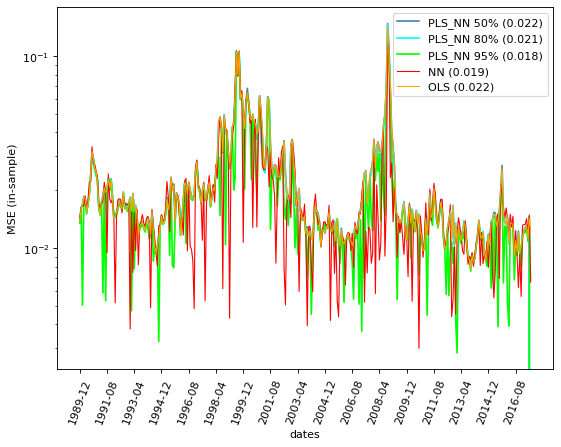

In [37]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

k = 0
for var in vars_explained:
    PLS_NN_label='PLS_NN ' + str(var) + '% (' + str(round(MSE_PLS_NN_in[var],3)) + ')'
    plt.plot(MSE_array_PLS_NN_in[var], label=PLS_NN_label, color=colors_PLS[k])
    k+=1
    
NN_label='NN (' + str(round(MSE_NN_in,3)) +')'
OLS_label='OLS (' + str(round(MSE_linear_in,3)) +')'

plt.plot(MSE_array_NN_in, color='red', label=NN_label, linewidth=1.0)
plt.plot(MSE_array_linear_in, color='orange', label=OLS_label,  linewidth=1.0)

plt.yscale('log')
plt.ylabel('MSE (in-sample)')
plt.xlabel('dates')
plt.xticks(np.arange(0,len(dates_to_plot)-1,20), dates_to_plot[np.arange(0,len(dates_to_plot)-1,20)], rotation=70)
plt.legend()
#plt.savefig('MSE_in_error.eps', format='eps',dpi=1200,bbox_inches = "tight")

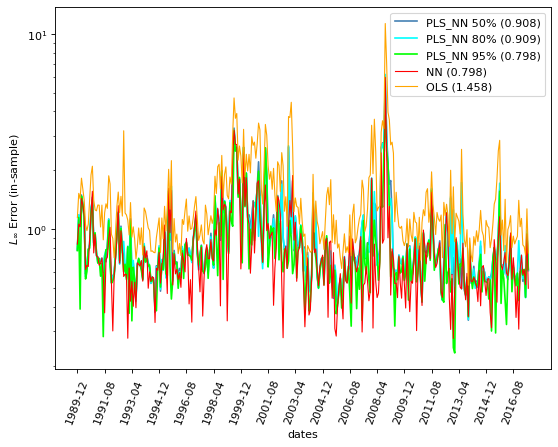

In [38]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

k = 0
for var in vars_explained:
    PLS_NN_label='PLS_NN ' + str(var) + '% (' + str(round(L_inf_PLS_NN_in[var],3)) + ')'
    plt.plot(L_inf_array_PLS_NN_in[var], label=PLS_NN_label, color=colors_PLS[k])
    k+=1

NN_label='NN (' + str(round(L_inf_NN_in,3)) +')'
OLS_label='OLS (' + str(round(L_inf_linear_in,3)) +')'

plt.plot(L_inf_array_NN_in, color='red', label=NN_label, linewidth=1.0)
plt.plot(L_inf_array_linear_in, color='orange', label=OLS_label, linewidth=1.0)

plt.yscale('log')
plt.ylabel('$L_{\infty}$ Error (in-sample)')
plt.xlabel('dates')
plt.xticks(np.arange(0,len(dates_to_plot)-1,20), dates_to_plot[np.arange(0,len(dates_to_plot)-1,20)], rotation=70)
plt.legend()
#plt.savefig('L_inf_in_error.eps', format='eps',dpi=1200,bbox_inches = "tight")

(0.005, 5)

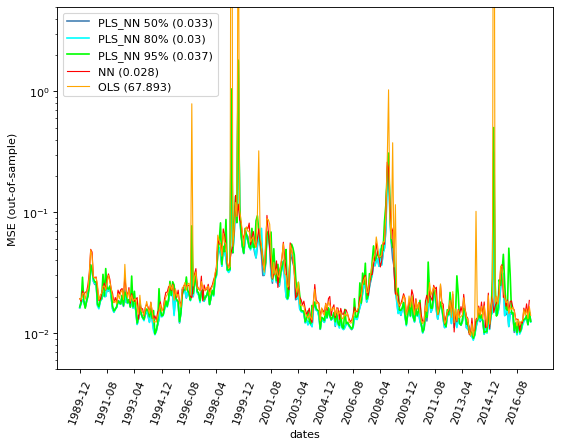

In [39]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

k = 0
for var in vars_explained:
    PLS_NN_label='PLS_NN ' + str(var) + '% (' + str(round(MSE_PLS_NN[var],3)) + ')'
    plt.plot(MSE_array_PLS_NN[var], label=PLS_NN_label, color=colors_PLS[k])
    k+=1

NN_label='NN (' + str(round(MSE_NN,3)) +')'
OLS_label='OLS (' + str(round(MSE_linear,3)) +')'

plt.plot(MSE_array_NN[:-1], color='red', label=NN_label, linewidth=1.0)
plt.plot(MSE_array_linear[:-1], color='orange', label=OLS_label, linewidth=1.0)

plt.yscale('log')
plt.ylabel('MSE (out-of-sample)')
plt.xlabel('dates')
plt.xticks(np.arange(0,len(dates_to_plot)-1,20), dates_to_plot[np.arange(0,len(dates_to_plot)-1,20)], rotation=70)
plt.legend()
#plt.savefig('MSE_error.eps', format='eps',dpi=1200,bbox_inches = "tight")
plt.ylim([5e-3, 5])

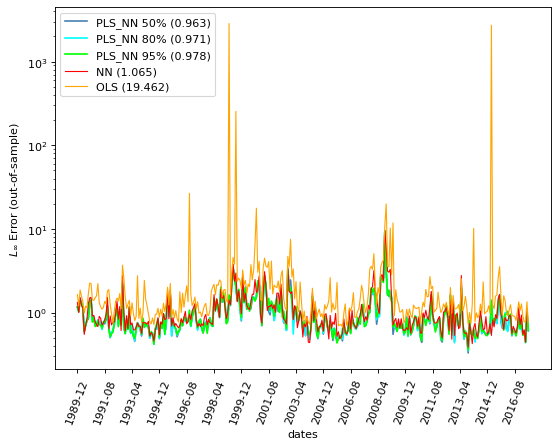

In [40]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

k = 0
for var in vars_explained:
    PLS_NN_label='PLS_NN ' + str(var) + '% (' + str(round(L_inf_PLS_NN[var],3)) + ')' 
    plt.plot(L_inf_array_PLS_NN[var], label=PLS_NN_label, color=colors_PLS[k])
    k+=1

NN_label='NN (' + str(round(L_inf_NN,3)) +')'
OLS_label='OLS (' + str(round(L_inf_linear,3)) +')'

plt.plot(L_inf_array_NN[:-1], color='red', label=NN_label, linewidth=1.0)
plt.plot(L_inf_array_linear[:-1], color='orange', label=OLS_label, linewidth=1.0)

plt.yscale('log')
plt.ylabel('$L_{\infty}$ Error (out-of-sample)')
plt.xlabel('dates')
plt.xticks(np.arange(0,len(dates_to_plot)-1,20), dates_to_plot[np.arange(0,len(dates_to_plot)-1,20)], rotation=70)
plt.legend()
#plt.savefig('L_inf_error.eps', format='eps',dpi=1200,bbox_inches = "tight")

# Additional analysis of outliers

In [ ]:
# analysis with removal of outlier

In [41]:
outlier_index=np.argsort(MSE_array_linear)[len(MSE_array_linear)-2:len(MSE_array_linear)]

In [42]:
outlier_index

array([303, 111], dtype=int64)

In [ ]:
# MSE without outliers

In [43]:
(np.sum(MSE_array_linear) - np.sum(MSE_array_linear[outlier_index]))/(testing_periods-2)

0.23737731260443648

In [ ]:
# L_inf without outliers

In [44]:
(np.sum(L_inf_array_linear) - np.sum(L_inf_array_linear[outlier_index]))/(testing_periods-2)

2.6601951374289214

In [91]:
print(testing_periods-120)
print(303-211)

211
92


In [45]:
for index in outlier_index:
    print(index)
    print(dates[index])

303
2015-03-01
111
1999-03-01


# Calculate information ratios

In [46]:
"""
 Information Ratio Calculation over most recent 10 year period
"""    

info_ratio = []
info_ratio_linear = []
info_ratio_NN = []
info_ratio_PLS_NN_50 = []
info_ratio_PLS_NN_80 = []
info_ratio_PLS_NN_95 = []
info_ratio_wn = []

m_range = [10,15,20,25,30,35,40,45,50]
for m in m_range:
    excess_returns_linear = []
    excess_returns_NN = []
    excess_returns_PLS_NN_50 = []
    excess_returns_PLS_NN_80 = []
    excess_returns_PLS_NN_95 = []
    excess_returns_wn = []
    
    excess_returns_std_linear = []
    excess_returns_std_NN = []
    excess_returns_std_PLS_NN_50 = []
    excess_returns_std_PLS_NN_80 = []
    excess_returns_std_PLS_NN_95 = []
    excess_returns_std_wn = []
    
    idx_linear = []
    idx_NN = []
    idx_PLS_NN_50 = []
    idx_PLS_NN_80 = []
    idx_PLS_NN_95 = []
    
    for i in range((testing_periods-120),testing_periods):
        idx_linear.append(np.argsort(-y_hat_linear[i].flatten())[:m])
        excess_returns_linear.append(np.mean(np.array(ys['test'][i])[idx_linear[-1]] ))
        
        idx_NN.append(np.argsort(-y_hat_NN[i].flatten())[:m])
        excess_returns_NN.append(np.mean(np.array(ys['test'][i])[idx_NN[-1]] ))
        
        idx_PLS_NN_50.append(np.argsort(-y_hat_PLS_NN[50][i].flatten())[:m])
        excess_returns_PLS_NN_50.append(np.mean(np.array(ys['test'][i])[idx_PLS_NN_50[-1]] ))
        
        idx_PLS_NN_80.append(np.argsort(-y_hat_PLS_NN[80][i].flatten())[:m])
        excess_returns_PLS_NN_80.append(np.mean(np.array(ys['test'][i])[idx_PLS_NN_80[-1]] ))

        idx_PLS_NN_95.append(np.argsort(-y_hat_PLS_NN[95][i].flatten())[:m])
        excess_returns_PLS_NN_95.append(np.mean(np.array(ys['test'][i])[idx_PLS_NN_95[-1]] ))
        
        #White Noise IR
        wn = np.asarray(random.sample(range(1, len(ys['test'][i])),m))
        excess_returns_wn.append(np.mean(np.array(ys['test'][i])[wn]))
        
    excess_returns_std_linear.append(np.std(excess_returns_linear))
    info_ratio_linear.append(np.mean(excess_returns_linear)/excess_returns_std_linear)
    
    excess_returns_std_NN.append(np.std(excess_returns_NN))
    info_ratio_NN.append(np.mean(excess_returns_NN)/excess_returns_std_NN)
    
    excess_returns_std_PLS_NN_50.append(np.std(excess_returns_PLS_NN_50))
    info_ratio_PLS_NN_50.append(np.mean(excess_returns_PLS_NN_50)/excess_returns_std_PLS_NN_50)
    
    excess_returns_std_PLS_NN_80.append(np.std(excess_returns_PLS_NN_80))
    info_ratio_PLS_NN_80.append(np.mean(excess_returns_PLS_NN_80)/excess_returns_std_PLS_NN_80)
    
    excess_returns_std_PLS_NN_95.append(np.std(excess_returns_PLS_NN_95))
    info_ratio_PLS_NN_95.append(np.mean(excess_returns_PLS_NN_95)/excess_returns_std_PLS_NN_95)
    
    excess_returns_std_wn.append(np.std(excess_returns_wn))
    info_ratio_wn.append(np.mean(excess_returns_wn)/excess_returns_std_wn)

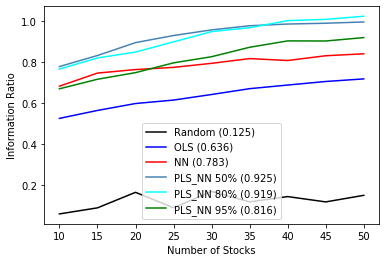

In [47]:
wn_label='Random (' + str(round(np.mean(info_ratio_wn),3)) + ')'
plt.plot(m_range, info_ratio_wn, label=wn_label, color='black')

OLS_label='OLS (' + str(round(np.mean(info_ratio_linear),3)) + ')'
plt.plot(m_range, info_ratio_linear, label=OLS_label, color='blue')

NN_label='NN (' + str(round(np.mean(info_ratio_NN),3)) + ')'
plt.plot(m_range, info_ratio_NN, label=NN_label, color='red')

PLS_NN_label='PLS_NN 50% (' + str(round(np.mean(info_ratio_PLS_NN_50),3)) + ')'
plt.plot(m_range, info_ratio_PLS_NN_50, label=PLS_NN_label, color='steelblue')

PLS_NN_label='PLS_NN 80% (' + str(round(np.mean(info_ratio_PLS_NN_80),3)) + ')'
plt.plot(m_range, info_ratio_PLS_NN_80, label=PLS_NN_label, color='cyan')

PLS_NN_label='PLS_NN 95% (' + str(round(np.mean(info_ratio_PLS_NN_95),3)) + ')'
plt.plot(m_range, info_ratio_PLS_NN_95, label=PLS_NN_label, color='green')

#plt.plot(m_range, info_ratio_NN_relu, label='NN (ReLU 10)', color='red', linestyle='--')
plt.xlabel('Number of Stocks')
plt.ylabel('Information Ratio')
plt.legend()
plt.savefig('IR.png', format='png',dpi=1200,bbox_inches = "tight")

In [48]:
X.columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9',
       'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18',
       'I0', 'I1', 'I2', 'I3', 'I4', 'I5', 'SI0', 'SI1', 'SI2', 'SI3',
       'SI4', 'SI5', 'SI6', 'SI7', 'SI8', 'SI9', 'SI10', 'S0', 'S1',
       'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'IG0',
       'IG1', 'IG2', 'IG3', 'date']

# Sector analysis

In [138]:
"""
 Sector analysis over most recent 10 year period.
"""    


m_range = [50]

df_WN = pd.DataFrame(columns=['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'])
df_linear = pd.DataFrame(columns=['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'])
df_NN = pd.DataFrame(columns=['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'])
df_PLS_NN_50 = pd.DataFrame(columns=['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9'])


for m in m_range:
    idx_linear = []
    idx_NN = []
    idx_PLS_NN_50 = []
    idx_WN = []
    for i in range((testing_periods-120),testing_periods):
        idx_linear.append(np.argsort(-y_hat_linear[i].flatten())[:m])
        series=pd.Series(X[['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']].iloc[idx_linear[-1]].mean())
        df_linear=df_linear.append(series, ignore_index=True)
                
        idx_NN.append(np.argsort(-y_hat_NN[i].flatten())[:m])
        series=pd.Series(X[['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']].iloc[idx_NN[-1]].mean())
        df_NN=df_NN.append(series, ignore_index=True)
        
        idx_PLS_NN_50.append(np.argsort(-y_hat_PLS_NN[50][i].flatten())[:m])
        series=pd.Series(X[['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']].iloc[idx_PLS_NN_50[-1]].mean())
        df_PLS_NN_50=df_PLS_NN_50.append(series, ignore_index=True)
 
        #White Noise IR
        idx_WN.append(np.random.choice(np.arange(0,len(ys['test'][i])),m))
        series=pd.Series(X[['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']].iloc[idx_WN[-1]].mean())
        df_WN=df_WN.append(series, ignore_index=True)

        
        

In [139]:
GICS={'S0':'Energy','S1':'Materials','S2':'Industrials','S3':'Consumer Discretionary','S4':'Consumer Staples','S5':'Health Care','S6':'Financials','S7':'Information Technology','S8':'Communication Services','S9':'Utilities','S10':'Real Estate'}

In [1]:
def trim_axs(axs, N):
    """
    Reduce *axs* to *N* Axes. All further Axes are removed from the figure.
    """
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

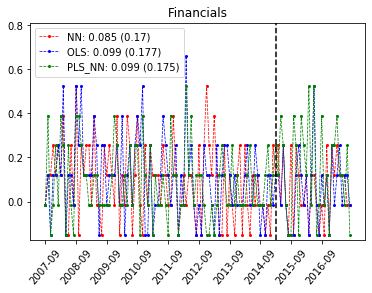

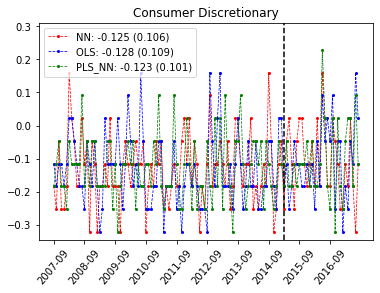

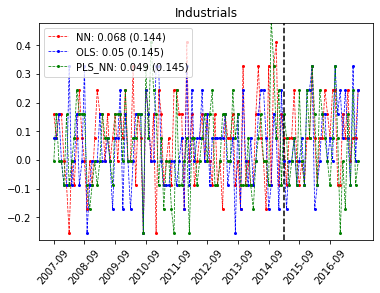

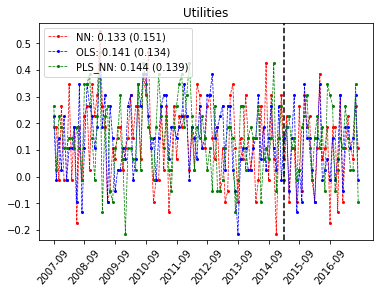

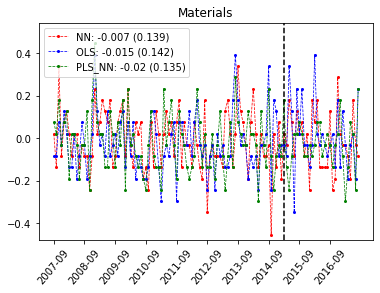

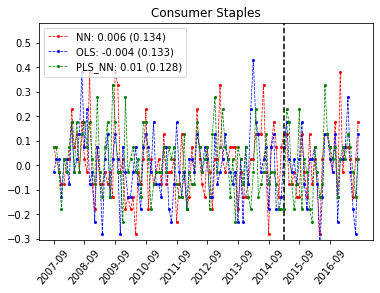

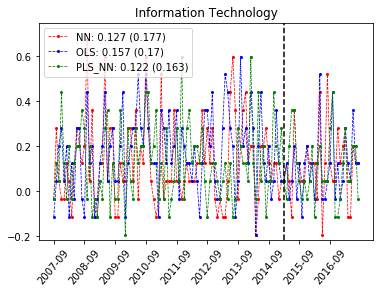

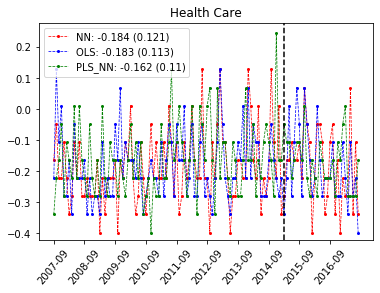

In [125]:
rows=2
cols = 4
#figsize=(20.5, 10)

n = 1

sectors = ['S6','S3','S2','S9','S1','S4','S7','S5'] # ,'S0','S8']

#fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
#axs = trim_axs(axs, len(sectors))
for sector in sectors:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('%s' % str(GICS[sector]))
    #set(ax,'xtickl',get(ax,'xtick'))
    wn_label='Random: ' + str(round(np.mean(df_WN[sector]),3)) + ' (' + str(round(np.std(df_WN[sector]),3))  + ')'
    OLS_label='OLS: ' + str(round(np.mean(df_linear[sector]),3)) +  ' (' + str(round(np.std(df_linear[sector]),3)) + ')'
    NN_label='NN: ' + str(round(np.mean(df_NN[sector]),3)) +  ' (' + str(round(np.std(df_NN[sector]),3)) +  ')'
    PLS_NN_50_label='PLS_NN: ' + str(round(np.mean(df_PLS_NN_50[sector]),3)) +  ' (' + str(round(np.std(df_PLS_NN_50[sector]),3)) +  ')'
    
    ax.plot(range(0,len(df_NN)), df_NN[sector], 'o', ls='--', ms=2, color='red', linewidth=0.75, label=NN_label)
    ax.plot(range(0,len(df_linear)), df_linear[sector], 'o', ls='--', ms=2, color='blue', linewidth=0.75, label=OLS_label)
    ax.plot(range(0,len(df_PLS_NN_50)), df_PLS_NN_50[sector], 'o', ls='--', ms=2, color='green', linewidth=0.75, label=PLS_NN_50_label)
    #ax.plot(range(0,len(df_WN)), df_WN[sector], 'o', ls='--', ms=4, color='black', label=wn_label)
    
    #ax.xlabel('dates')
    #ax.set_xticklabels(np.arange(0,120,12), dates[np.arange(n-120,n,12)], rotation=70)
    fontdict= {'fontsize': 10,
    'fontweight': 1,
     'verticalalignment': 'bottom'}
    ax.set_ylim([np.min(df_NN[sector])-0.025,np.max(df_linear[sector])+0.15])
    ax.set_xticks(np.arange(0,120,12))
    ax.set_xticklabels(dates_to_plot[np.arange(n-120,n,12)])#, fontdict=fontdict) #, rotation=70)
    ax.tick_params(axis='x', rotation=50)
    ax.axvline(x=90, linestyle='--', color='black')
    ax.legend(loc='upper left')#, bbox_to_anchor=(1, 0.5))
    name = "../figure/sector_tilts_hi/Sector_%s.png" % (str(GICS[sector]))
    fig.savefig(name, format='png',dpi=1200, bbox_inches = "tight")
    
    name_pickle = "../data/figure_data/sector_analysis/%s.fig.pickle" % ('Sector_' + str(GICS[sector]))
    pickle.dump(fig, open(name_pickle, 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`



In [ ]:
# show factor tilts on 2015-10-01 - the date of the outlier

In [182]:
print([GICS[sector] for sector in sectors])

['Energy', 'Consumer Discretionary', 'Industrials', 'Utilities', 'Materials', 'Consumer Staples', 'Information Technology', 'Health Care']


In [217]:
print(len(df_NN))
print(testing_periods-120)
print((testing_periods-303))

120
211
28


10


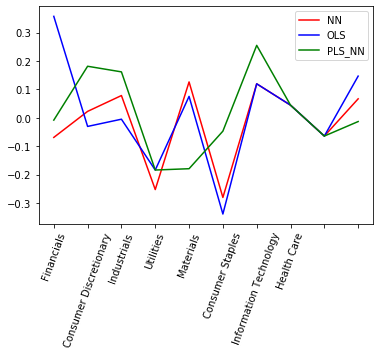

In [141]:
NN_outlier = df_NN.iloc[90].values
OLS_outlier = df_linear.iloc[90].values
PLS_NN_outlier = df_PLS_NN_50.iloc[90].values

plt.plot(range(0,10), NN_outlier, color='red', label='NN')
plt.plot(range(0,10), OLS_outlier, color='blue', label='OLS')
plt.plot(range(0,10), PLS_NN_outlier, color='green', label='PLS_NN')
plt.xticks(range(0,10), [ GICS[sector] for sector in sectors ], rotation=70)
plt.legend()
#plt.ylim([-0.2, 0.2])
plt.savefig('../figure/sector_tilts_2015-03-01.png', format='png',dpi=1200,bbox_inches = "tight")

name_pickle = "../data/figure_data/outliers_analysis/sector_tilts_2015-03-01.fig.pickle"
pickle.dump(fig, open(name_pickle, 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`

In [141]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# Data
r = [0,1,2]

keys = df_WN.columns
raw_data = {}
for key in keys:
   raw_data[key]=[]
   raw_data[key].append(df_linear.mean()[key]) 
   raw_data[key].append(df_NN.mean()[key]) 
   raw_data[key].append(df_WN.mean()[key]) 

df = pd.DataFrame(raw_data)

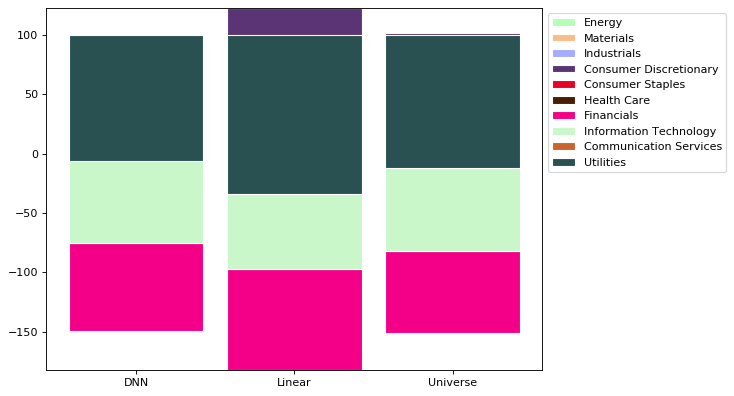

In [144]:
# From raw value to percentage
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
totals = [i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(df['S0'], df['S1'], df['S2'], df['S3'], df['S4'],df['S5'],df['S6'], df['S7'], df['S8'], df['S9'] )]
S0Bars = [i / j * 100 for i,j in zip(df['S0'], totals)]
S1Bars = [i / j * 100 for i,j in zip(df['S1'], totals)]
S2Bars = [i / j * 100 for i,j in zip(df['S2'], totals)]
S3Bars = [i / j * 100 for i,j in zip(df['S3'], totals)]
S4Bars = [i / j * 100 for i,j in zip(df['S4'], totals)]
S5Bars = [i / j * 100 for i,j in zip(df['S5'], totals)]
S6Bars = [i / j * 100 for i,j in zip(df['S6'], totals)]
S7Bars = [i / j * 100 for i,j in zip(df['S7'], totals)]
S8Bars = [i / j * 100 for i,j in zip(df['S8'], totals)]
S9Bars = [i / j * 100 for i,j in zip(df['S9'], totals)]
#S10Bars = [i / j * 100 for i,j in zip(df['S10'], totals)]
 
# plot
barWidth = 0.85
names = ('DNN','Linear','Universe')
# Create green Bars
plt.bar(r, S0Bars, color='#b5ffb9', edgecolor='white', width=barWidth, label=GICS['S0'])
# Create orange Bars
plt.bar(r, S1Bars, bottom=S0Bars, color='#f9bc86', edgecolor='white', width=barWidth, label=GICS['S1'])
# Create blue Bars
plt.bar(r, S2Bars, bottom=[i+j for i,j in zip(S0Bars, S1Bars)], color='#a3acff', edgecolor='white', width=barWidth, label=GICS['S2'])
# Create blue Bars
plt.bar(r, S3Bars, bottom=[i+j+k for i,j,k in zip(S0Bars, S1Bars, S2Bars)], color='#5b3475', edgecolor='white', width=barWidth, label=GICS['S3'])
# Create blue Bars
plt.bar(r, S4Bars, bottom=[i+j+k+l for i,j,k,l in zip(S0Bars, S1Bars, S2Bars, S3Bars)], color='#e80027', edgecolor='white', width=barWidth, label=GICS['S4'])
# Create blue Bars
plt.bar(r, S5Bars, bottom=[i+j+k+l+m for i,j,k,l,m in zip(S0Bars, S1Bars, S2Bars, S3Bars, S4Bars)], color='#471e02', edgecolor='white', width=barWidth, label=GICS['S5'])
# Create blue Bars
plt.bar(r, S6Bars, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(S0Bars, S1Bars, S2Bars, S3Bars, S4Bars, S5Bars)], color='#f40088', edgecolor='white', width=barWidth, label=GICS['S6'])
# Create blue Bars
plt.bar(r, S7Bars, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(S0Bars, S1Bars, S2Bars, S3Bars, S4Bars, S5Bars,S6Bars)], color='#c9f7ca', edgecolor='white', width=barWidth, label=GICS['S7'])
# Create blue Bars
plt.bar(r, S8Bars, bottom=[i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(S0Bars, S1Bars, S2Bars, S3Bars, S4Bars, S5Bars,S6Bars,S7Bars)], color='#ca642d', edgecolor='white', width=barWidth, label=GICS['S8'])
# Create blue Bars
plt.bar(r, S9Bars, bottom=[i+j+k+l+m+n+o+p+q for i,j,k,l,m,n,o,p,q in zip(S0Bars, S1Bars, S2Bars, S3Bars, S4Bars, S5Bars,S6Bars,S7Bars,S8Bars)], color='#295151', edgecolor='white', width=barWidth, label=GICS['S9'])

#plt.bar(r, S10Bars, bottom=[i+j+k+l+m+n+o+p+q+r for i,j,k,l,m,n,o,p,q,r in zip(S0Bars, S1Bars, S2Bars, S3Bars, S4Bars, S5Bars,S6Bars,S7Bars,S8Bars,S9Bars)], color='#a3ff00', edgecolor='white', width=barWidth, label=GICS['S10'])

    
# Custom x axis
plt.xticks(r, names)
#plt.xlabel("group")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
#plt.show()
plt.savefig('sectors.png', format='png',dpi=1200)#,bbox_inches = "tight")

# factor analysis

In [129]:
"""
 factor analysis over most recent 10 year period.
"""    


m_range = [50]
columns=['F1', 'F2', 'F3', 'F5', 'F6', 'F7','F8', 'F9', 'F12', 'F13', 'F14',
       'F16', 'F17','F18']
df_WN = pd.DataFrame(columns=columns)
df_linear = pd.DataFrame(columns=columns)
df_NN = pd.DataFrame(columns=columns)
df_PLS_NN_50 = pd.DataFrame(columns=columns)

for m in m_range:
    idx_linear = []
    idx_NN = []
    idx_PLS_NN_50 = []
    idx_WN = []
    for i in range((testing_periods-120),testing_periods):
        idx_linear.append(np.argsort(-y_hat_linear[i].flatten())[:m])
        series=pd.Series(X[columns].iloc[idx_linear[-1]].mean())
        df_linear=df_linear.append(series, ignore_index=True)
        
        idx_NN.append(np.argsort(-y_hat_NN[i].flatten())[:m])
        series=pd.Series(X[columns].iloc[idx_NN[-1]].mean())
        df_NN=df_NN.append(series, ignore_index=True)
         
        idx_PLS_NN_50.append(np.argsort(-y_hat_PLS_NN[50][i].flatten())[:m])
        series=pd.Series(X[columns].iloc[idx_PLS_NN_50[-1]].mean())
        df_PLS_NN_50 = df_PLS_NN_50.append(series, ignore_index=True)

        #White Noise IR
        idx_WN.append(np.random.choice(np.arange(0,len(ys['test'][i])),m))
        series=pd.Series(X[columns].iloc[idx_WN[-1]].mean())
        df_WN=df_WN.append(series, ignore_index=True)


In [ ]:
# show factor tilts on 2015-10-01 - the date of the outlier

In [130]:
names={'F1':'B/P', 'F2':'CF/P', 'F3':'E/P', 'F4':'S/EV', 'F5':'EB/EV', 'F6':'FE/P', 'F7':'TAG', 'F8':'MC', 'F9':'S', 'F10':'TA', 'F11':'TrA', 'F12':'EaV/TA', 'F13':'CFV/TA', 'F14':'SV/TA','F15':'RV', 'F16':'CB','F17':'Div', 'F18':'EG'}

In [131]:
names_to_save={'F1':'B-P', 'F2':'CF-P', 'F3':'E-P', 'F4':'S-EV', 'F5':'EB-EV', 'F6':'FE-P', 'F7':'TAG', 'F8':'MC', 'F9':'S', 'F10':'TA', 'F11':'TrA', 'F12':'EaV-TA', 'F13':'CFV-TA', 'F14':'SV-TA','F15':'RV', 'F16':'CB','F17':'Div', 'F18':'EG'}

In [132]:
full_names={'F1':'Book to Price (B/P)', 'F2': 'Cash Flow to Price (CF/P)', 'F3':'Earning to Price (E/P)', 'F5': 'EBIDTA to EV (EB/EV)', 'F7': 'Total Asset Growth (TAG)', 'F13':'Cash Flow Volatility to Total Assets (CFV/TA)', 'F14':'Sales Volatility to Total Assets (SV/TA)', 'F16': 'Rolling CAPM Beta (CB)'}

In [135]:
df_NN.iloc[90].values

array([-0.97556396, -0.2803169 , -0.00283392,  0.01089372, -0.00192857,
        0.08437857, -0.21372287, -0.19813805, -0.0281002 ,  0.00676939,
       -0.11293519, -0.21470165, -0.1686803 ,  0.03397986])

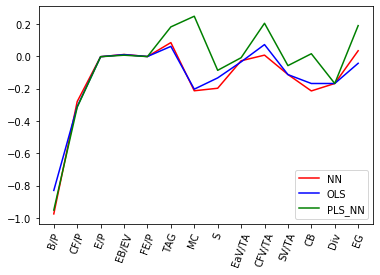

In [136]:
NN_outlier = df_NN.iloc[90].values
OLS_outlier = df_linear.iloc[90].values
PLS_NN_outlier = df_PLS_NN_50.iloc[90].values

plt.plot(range(0,14), NN_outlier, color='red', label='NN')
plt.plot(range(0,14), OLS_outlier, color='blue', label='OLS')
plt.plot(range(0,14), PLS_NN_outlier, color='green', label='PLS_NN')
plt.xticks(range(0,14), [ names[column] for column in columns ], rotation=70)
plt.legend()
#plt.ylim([-0.2, 0.2])
plt.savefig('../figure/factor_tilts_2015-03-01.png', format='png',dpi=1200,bbox_inches = "tight")

name_pickle = "../data/figure_data/outliers_analysis/factor_tilts_2015-03-01.fig.pickle"
pickle.dump(fig, open(name_pickle, 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`

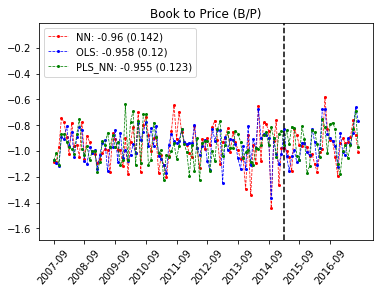

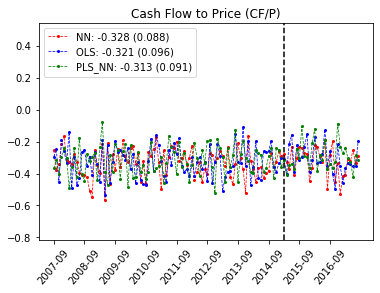

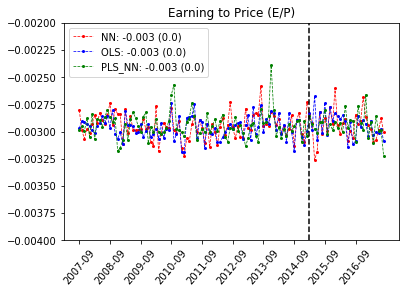

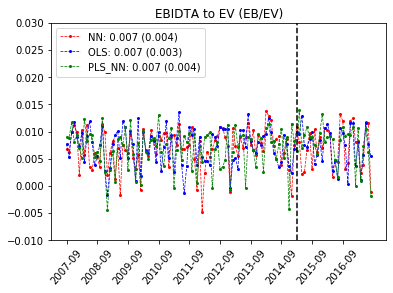

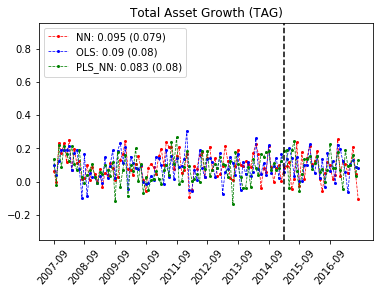

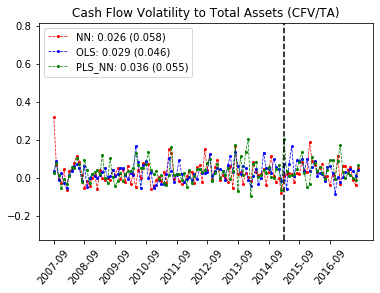

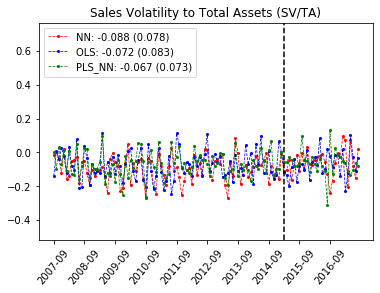

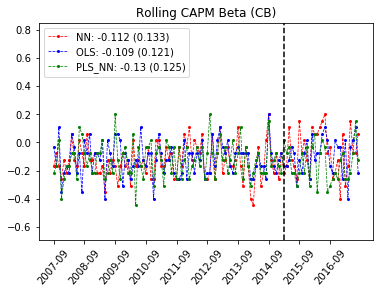

In [120]:
rows=2
cols = 4
#figsize=(20.5, 10)
# plot a subset of factors
factors=['F1', 'F2', 'F3', 'F5',  'F7', 'F13', 'F14','F16']

#factors=columns #uncomment for all factors
#fig1, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
#axs = trim_axs(axs, len(factors))
for factor in factors:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('%s' % str(full_names[factor]))
    
    wn_label='Random: ' + str(round(np.mean(df_WN[factor]),3)) + ' (' + str(round(np.std(df_WN[factor]),3))  + ')'
    OLS_label='OLS: ' + str(round(np.mean(df_linear[factor]),3)) +  ' (' + str(round(np.std(df_linear[factor]),3)) + ')'
    NN_label='NN: ' + str(round(np.mean(df_NN[factor]),3)) +  ' (' + str(round(np.std(df_NN[factor]),3)) +  ')'
    PLS_NN_label='PLS_NN: ' + str(round(np.mean(df_PLS_NN_50[factor]),3)) +  ' (' + str(round(np.std(df_PLS_NN_50[factor]),3)) +  ')'
    
    ax.plot(range(0,len(df_NN)), df_NN[factor], 'o', ls='--', ms=2, color='red',linewidth=0.75, label=NN_label)
    ax.plot(range(0,len(df_linear)), df_linear[factor], 'o', ls='--', ms=2, color='blue',linewidth=0.75, label=OLS_label)
    ax.plot(range(0,len(df_PLS_NN_50)), df_PLS_NN_50[factor], 'o', ls='--', ms=2, color='green',linewidth=0.75, label=PLS_NN_label)
    #ax.plot(range(0,len(df_WN)), df_WN[sector], 'o', ls='--', ms=4, color='black', label=wn_label)
    
    #ax.xlabel('dates')
    #ax.set_xticklabels(np.arange(0,120,12), dates[np.arange(n-120,n,12)], rotation=70)
    fontdict= {'fontsize': 10,
    'fontweight': 1,
     'verticalalignment': 'baseline'}
    if factor == 'F5':
        ax.set_ylim([-0.01,0.03])
    elif factor == 'F3':
        ax.set_ylim([-0.004,-0.002])
    else:
        ax.set_ylim([np.min(df_NN[factor])-0.25,np.max(df_linear[factor])+0.65])
    ax.set_xticks(np.arange(0,120,12), minor=False)
    ax.set_xticklabels(dates_to_plot[np.arange(n-120,n,12)])#, fontdict=fontdict) #, rotation=70)
    ax.tick_params(axis='x', rotation=50)
    ax.axvline(x=90, linestyle='--', color='black')
    ax.legend(loc='upper left')#, bbox_to_anchor=(1, 0.5))

    name_png = "../figure/factor_tilts_hi/%s.png" % ('Factor_' + str(names_to_save[factor]))
    fig.savefig(name_png, format='png',dpi=1200,bbox_inches = "tight")
    
    name_pickle = "../data/figure_data/factor_analysis/%s.fig.pickle" % ('Factor_' + str(names_to_save[factor]))
    pickle.dump(fig, open(name_pickle, 'wb')) # This is for Python 3 - py2 may need `file` instead of `open`